In [2]:
import wave
import matplotlib.pyplot as plt
import imp
import scipy.signal as sig
import numpy as np
import struct

import wavecontroller
import pitch
import bufconv
import alignpitch
import wavegenerater

%matplotlib inline

In [266]:
imp.reload(wavecontroller)
wavecontroller.show_info("data/original/a.wav")

チャンネル数: 2
サンプル幅: 2
サンプリング周波数: 44100
フレーム数: 105408
パラメータ: (2, 2, 44100, 105408, 'NONE', 'not compressed')
長さ（秒）: 2.39020408163


In [192]:
result = sig.correlate([1,4,2,3,3,2], [1,4,2,3,3,2], mode="valid")
result[:]

array([43])

array([ 95, 143, 275, 409, 469, 536, 587, 663, 711, 843])

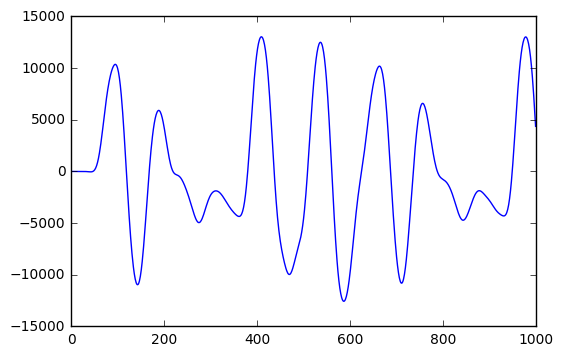

In [333]:
imp.reload(wavecontroller)
imp.reload(pitch)
wavefile = "a2.wav"
data = wavecontroller.smoothing(wavecontroller.get_data("data/original/"+wavefile), 4)

plt.plot(data[:1000])

#pitch.find_first_peak(data)
pitch.find_peaks(data, local_width=100, min_peak_distance=30)[0][:10]

700.0


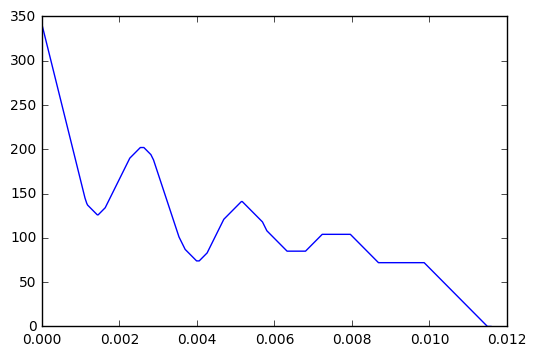

In [334]:
imp.reload(wavecontroller)
imp.reload(pitch)
wavefile = "a2.wav"
data = wavecontroller.smoothing(wavecontroller.get_data("data/original/"+wavefile), 4)

pitch.calc_pitch(data, 44100)

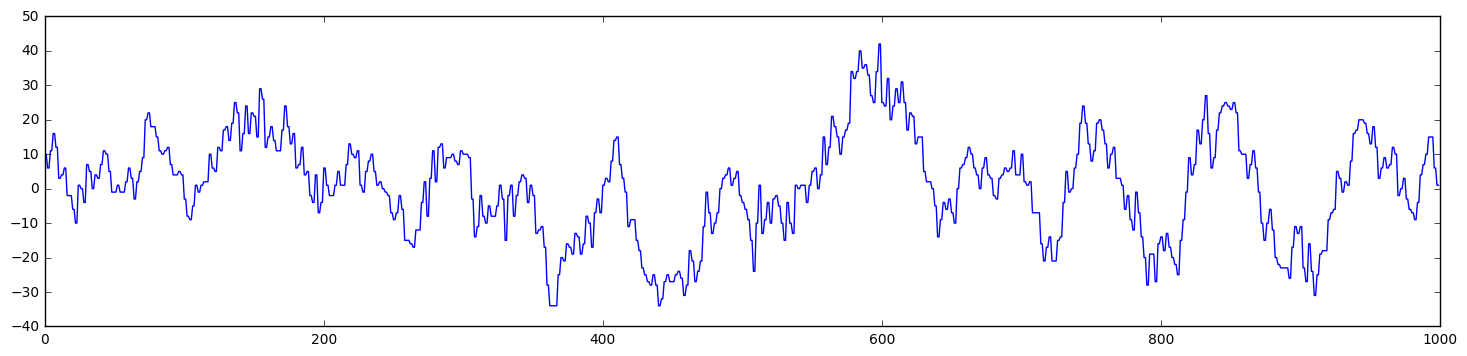

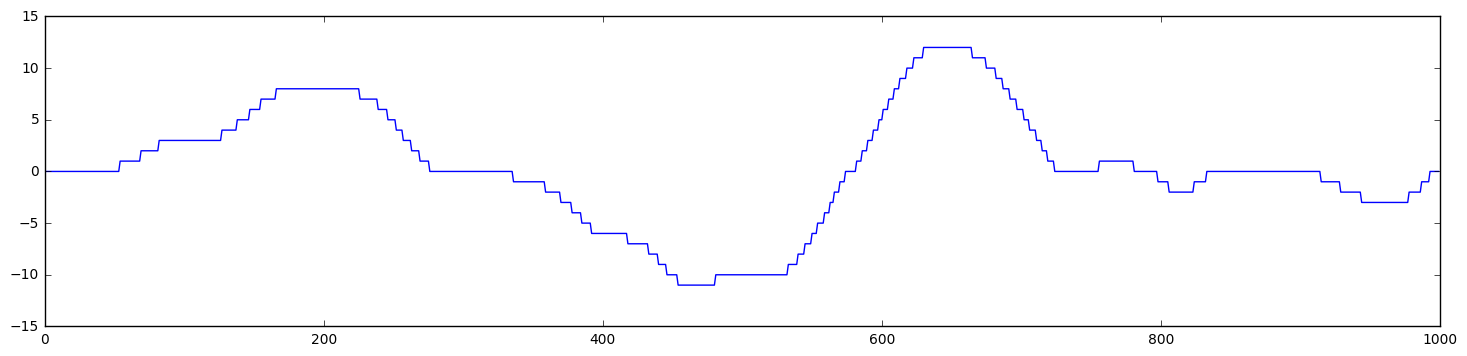

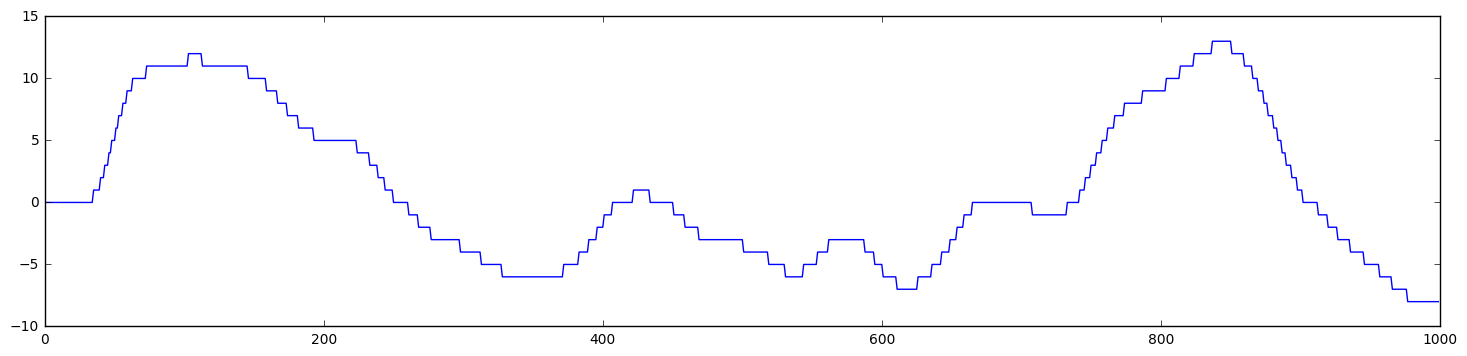

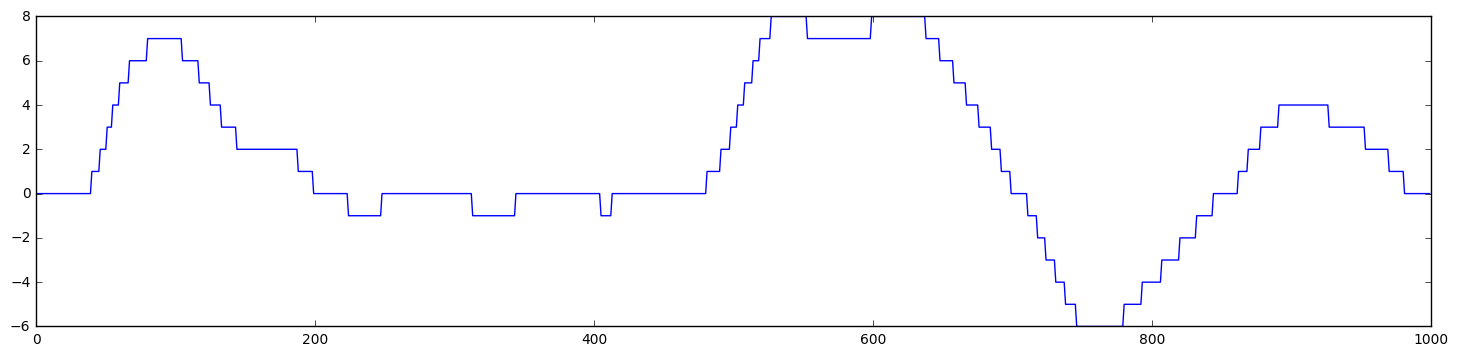

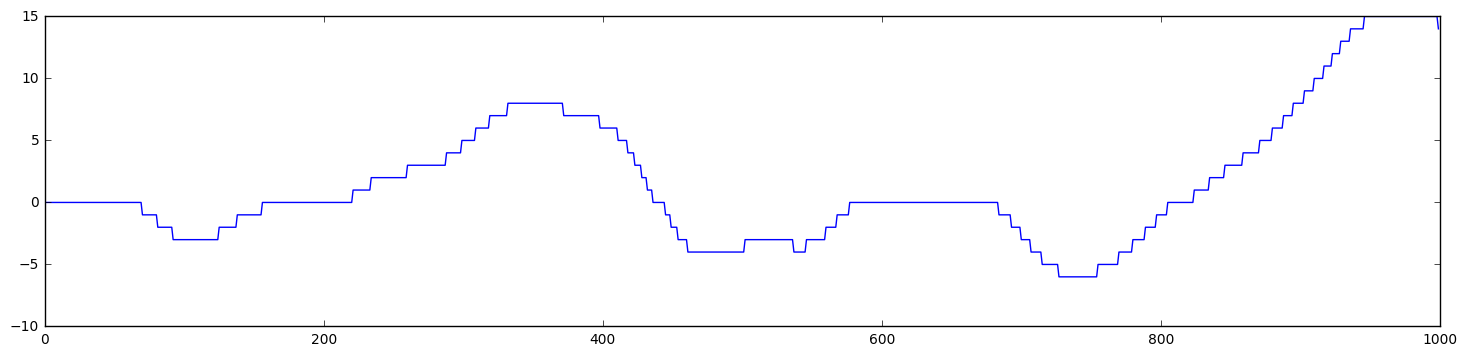

In [448]:
imp.reload(wavecontroller)

ROUGHNESS1 = 100
ROUGHNESS2 = 500
ROUGHNESS3 = 2000
ROUGHNESS4 = 7000 # 使わないほうがいいかも

filename = "arayuru"
data = wavecontroller.get_data("data/"+filename+"/"+filename+".wav")
wavecontroller.show_image(data)

s1_data = wavecontroller.smoothing(data, ROUGHNESS1)
wavecontroller.show_image(s1_data)
wavecontroller.save_file("data/"+filename+"/s1_"+filename+".wav", s1_data, 44100)

s2_data = wavecontroller.smoothing(data, ROUGHNESS2)
wavecontroller.show_image(s2_data)
wavecontroller.save_file("data/"+filename+"/s2_"+filename+".wav", s2_data, 44100)

s3_data = wavecontroller.smoothing(data, ROUGHNESS3)
wavecontroller.show_image(s3_data)
wavecontroller.save_file("data/"+filename+"/s3_"+filename+".wav", s3_data, 44100)

s4_data = wavecontroller.smoothing(data, ROUGHNESS4)
wavecontroller.show_image(s4_data)
wavecontroller.save_file("data/"+filename+"/s4_"+filename+".wav", s4_data, 44100)

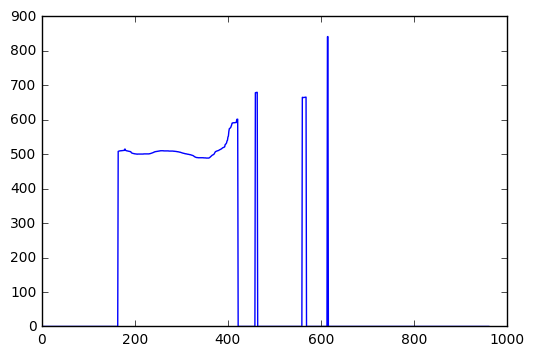

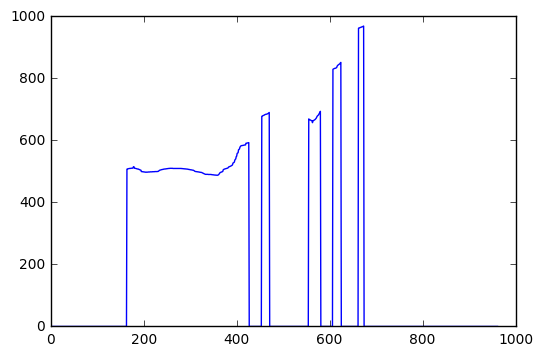

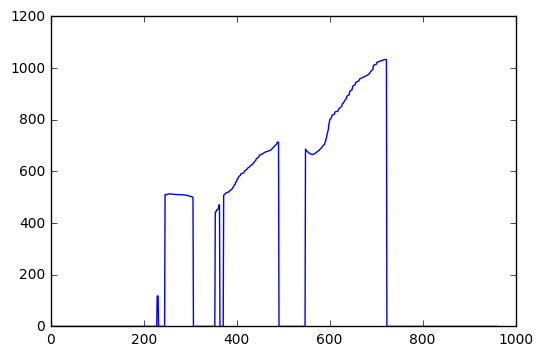

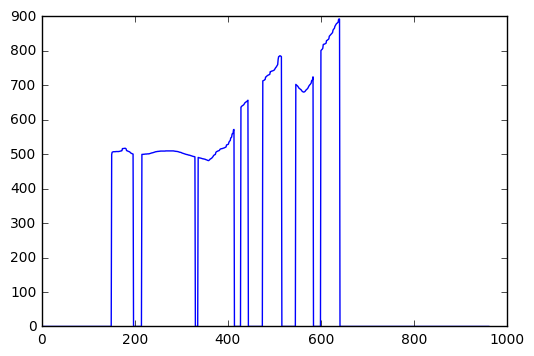

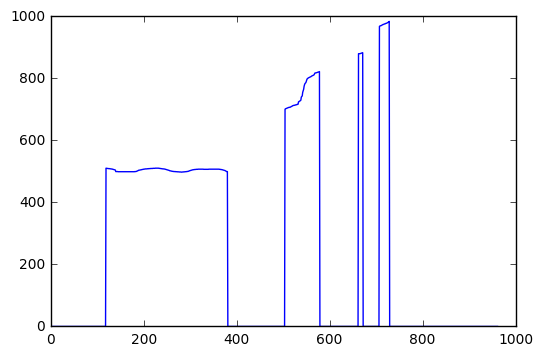

In [63]:
imp.reload(bufconv)

filename = "nantehida"

buf_file = "data/"+filename+"/"+filename+".pitch"
results = bufconv.read_float(buf_file)
x = np.arange(len(results))
y = results
plt.plot(x, y)
plt.show()

buf_file = "data/"+filename+"/s1_"+filename+".pitch"
results = bufconv.read_float(buf_file)
x = np.arange(len(results))
y = results
plt.plot(x, y)
plt.show()

buf_file = "data/"+filename+"/s2_"+filename+".pitch"
results = bufconv.read_float(buf_file)
x = np.arange(len(results))
y = results
plt.plot(x, y)
plt.show()

buf_file = "data/"+filename+"/s3_"+filename+".pitch"
results = bufconv.read_float(buf_file)
x = np.arange(len(results))
y = results
plt.plot(x, y)
plt.show()

buf_file = "data/"+filename+"/s4_"+filename+".pitch"
results = bufconv.read_float(buf_file)
x = np.arange(len(results))
y = results
plt.plot(x, y)
plt.show()

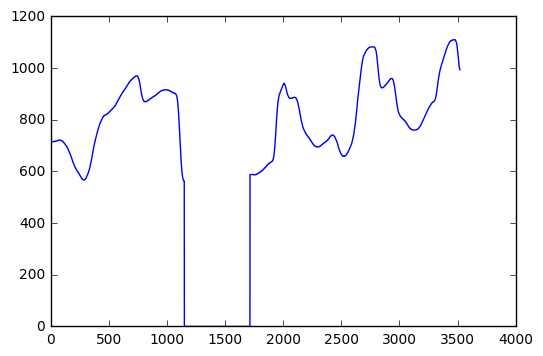

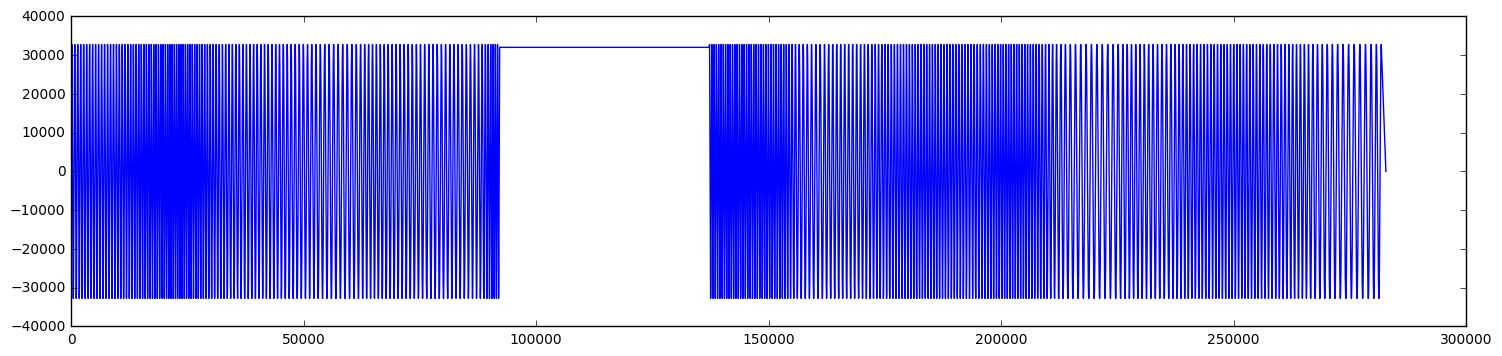

In [128]:
imp.reload(alignpitch)

filename = "arayuru"

buf_files = ["data/"+filename+"/"+filename+".pitch",
                     "data/"+filename+"/s1_"+filename+".pitch",
                     "data/"+filename+"/s2_"+filename+".pitch",
                     "data/"+filename+"/s3_"+filename+".pitch",
                     "data/"+filename+"/s4_"+filename+".pitch"]
results = alignpitch.merge_pitch_file(buf_files)
bufconv.write_float("data/"+filename+"/m_"+filename+".pitch", results)
x = np.arange(len(results))
y = results
plt.plot(x,y)
plt.show()

# generate sounds
freq_data = wavegenerater.pitch2freq(results)
data = wavegenerater.sin_wave(freq_data)

wavecontroller.save_file("data/"+filename+"/test.wav", data, wavegenerater.SAMPLE_FREQ)
wavecontroller.show_image(data)

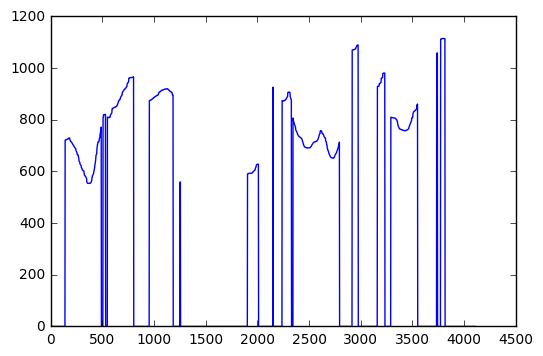

7.464609800362976

In [441]:
imp.reload(bufconv)

filename = "arayuru"

buf_file = "data/"+filename+"/"+filename+".pitch"
results = bufconv.read_float(buf_file)
x = np.arange(len(results))
y = results
plt.plot(x, y)
plt.show()
float(len(results))/551

In [114]:
x = np.array([2,3,4])
np.mean(np.append(x, [1,1]))

2.2000000000000002